C:\Users\avumi\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


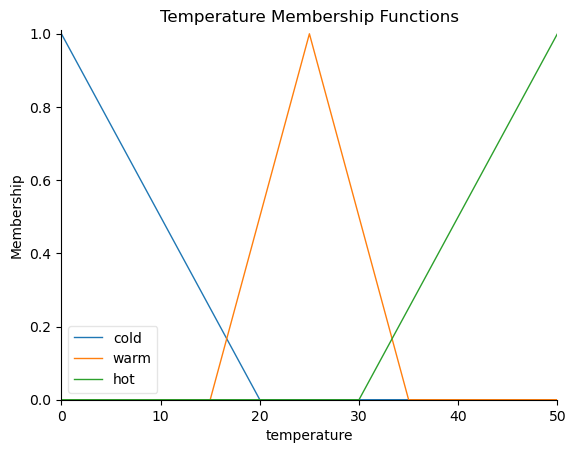

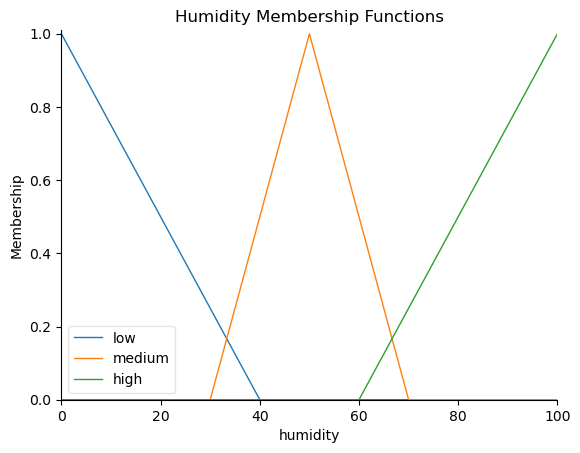

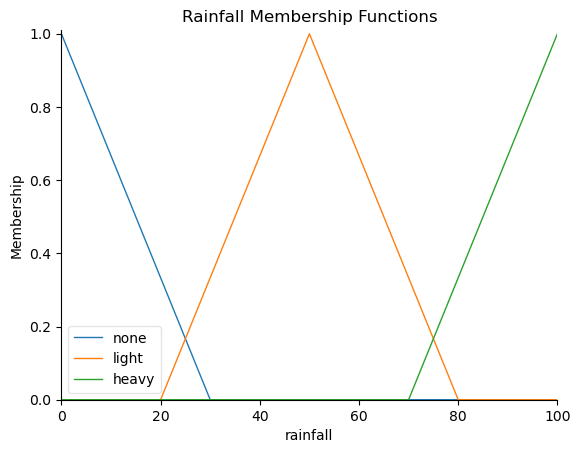

--- Single Test Prediction ---
Predicted Rainfall Value: 50.00 (out of 100)


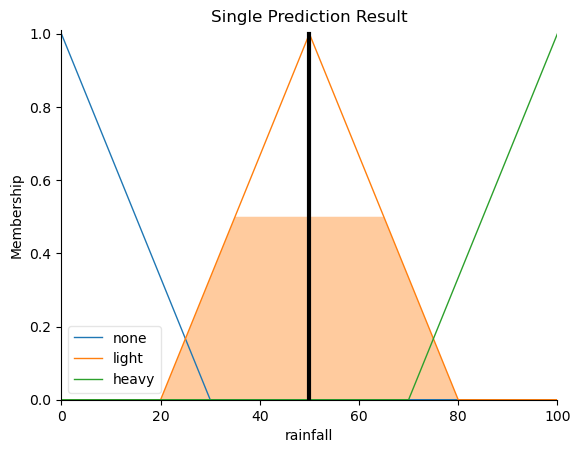


--- Running Validation on Test Data from CSV ---
-------------------------------------------------------
Temp (°C)  | Humidity (%) | Predicted    | Expected    
-------------------------------------------------------
10         | 30           | none         | none        
15         | 80           | none         | none        
25         | 50           | light        | light       
28         | 65           | light        | light       
35         | 80           | heavy        | heavy       
38         | 90           | heavy        | heavy       
45         | 40           | light        | none        
22         | 95           | heavy        | heavy       
5          | 60           | none         | none        
33         | 75           | heavy        | heavy       
12         | 90           | none         | none        
18         | 75           | light        | light       
20         | 60           | light        | light       
24         | 85           | heavy        | heavy      

In [14]:



# Install Libraries (run this once)
!pip install numpy scikit-fuzzy matplotlib pandas

# Import Libraries and Configure Matplotlib
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Define Fuzzy Variables (Antecedents and Consequent)
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
rainfall = ctrl.Consequent(np.arange(0, 101, 1), 'rainfall')

# Define Membership Functions
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 50, 50])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])

rainfall['none'] = fuzz.trimf(rainfall.universe, [0, 0, 30])
rainfall['light'] = fuzz.trimf(rainfall.universe, [20, 50, 80])
rainfall['heavy'] = fuzz.trimf(rainfall.universe, [70, 100, 100])

# Visualize Membership Functions
temperature.view()
plt.title('Temperature Membership Functions')
plt.show()
humidity.view()
plt.title('Humidity Membership Functions')
plt.show()
rainfall.view()
plt.title('Rainfall Membership Functions')
plt.show()

# Define the Fuzzy Rules
rule1 = ctrl.Rule(temperature['hot'] & humidity['high'], rainfall['heavy'])
rule2 = ctrl.Rule(temperature['warm'] & humidity['medium'], rainfall['light'])
rule3 = ctrl.Rule(temperature['warm'] & humidity['high'], rainfall['heavy'])
rule4 = ctrl.Rule(temperature['cold'], rainfall['none'])
rule5 = ctrl.Rule(humidity['low'], rainfall['none'])
rule6 = ctrl.Rule(temperature['hot'] & humidity['medium'], rainfall['light'])

# Create the Control System and Simulation
rainfall_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
rainfall_simulation = ctrl.ControlSystemSimulation(rainfall_ctrl)

# Run a Single Simulation (Interactive Test)
input_temperature = 40.0
input_humidity = 60.0
rainfall_simulation.input['temperature'] = input_temperature
rainfall_simulation.input['humidity'] = input_humidity
rainfall_simulation.compute()
predicted_rainfall = rainfall_simulation.output['rainfall']
print(f"--- Single Test Prediction ---")
print(f"Predicted Rainfall Value: {predicted_rainfall:.2f} (out of 100)")
rainfall.view(sim=rainfall_simulation)
plt.title('Single Prediction Result')
plt.show()


# Test the System by Reading from 'rainfall_data.csv'
try:
    test_data = pd.read_csv('rainfall_data.csv')
    print("\n--- Running Validation on Test Data from CSV ---")
    print("-" * 55)
    print(f"{'Temp (°C)':<10} | {'Humidity (%)':<12} | {'Predicted':<12} | {'Expected':<12}")
    print("-" * 55)
    correct_predictions = 0
    for index, row in test_data.iterrows():
        rainfall_simulation.input['temperature'] = row['temperature']
        rainfall_simulation.input['humidity'] = row['humidity']
        rainfall_simulation.compute()
        prediction_value = rainfall_simulation.output['rainfall']

        if prediction_value <= 35:
            predicted_category = 'none'
        elif prediction_value <= 75:
            predicted_category = 'light'
        else:
            predicted_category = 'heavy'

        if predicted_category == row['expected_rainfall_category']:
            correct_predictions += 1

        print(f"{row['temperature']:<10} | {row['humidity']:<12} | {predicted_category:<12} | {row['expected_rainfall_category']:<12}")
    print("-" * 55)
    accuracy = (correct_predictions / len(test_data)) * 100
    print(f"System Performance: {correct_predictions}/{len(test_data)} correct predictions.")
    print(f"Simple 'Accuracy' Score: {accuracy:.2f}%")

except FileNotFoundError:
    print("\nERROR: 'rainfall_data.csv' not found.")
    print("Please make sure you have created the file and it is in the same folder as this notebook.")

C:\Users\avumi\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


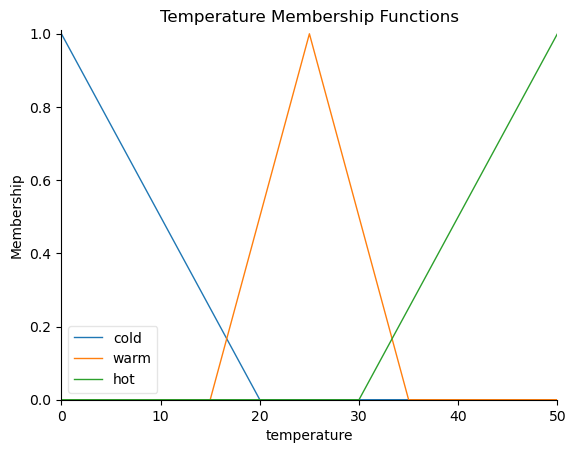

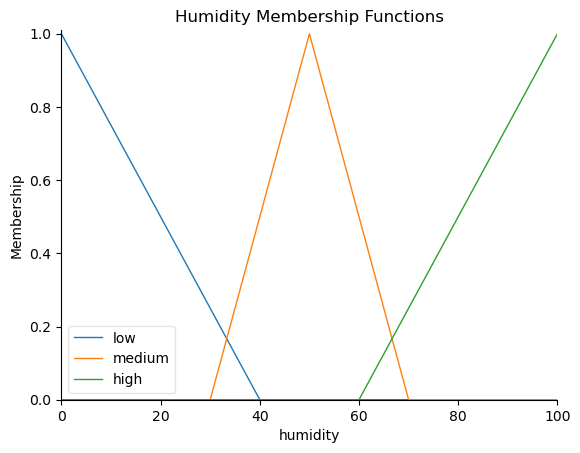

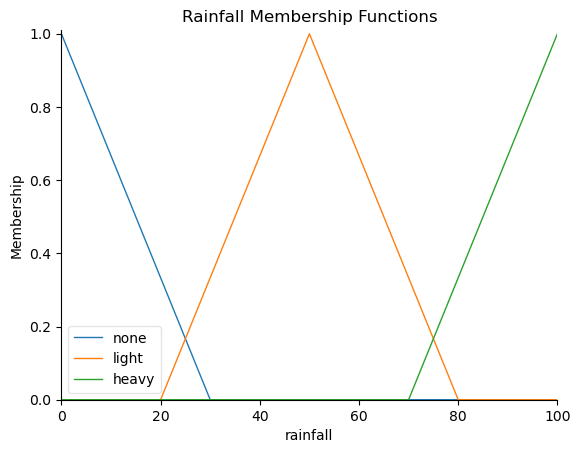

--- Single Test Prediction ---
Predicted Rainfall Value: 50.00 (out of 100)


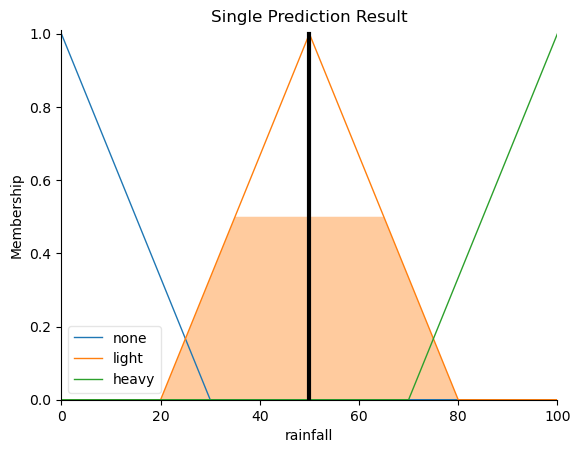


--- Running Validation on Test Data from CSV ---
-------------------------------------------------------
Temp (°C)  | Humidity (%) | Predicted    | Expected    
-------------------------------------------------------
10         | 30           | none         | none        
15         | 80           | none         | none        
25         | 50           | light        | light       
28         | 65           | light        | light       
35         | 80           | heavy        | heavy       
38         | 90           | heavy        | heavy       
45         | 40           | light        | none        
22         | 95           | heavy        | heavy       
5          | 60           | none         | none        
33         | 75           | heavy        | heavy       
12         | 90           | none         | none        
18         | 75           | light        | light       
20         | 60           | light        | light       
24         | 85           | heavy        | heavy      

In [14]:



# Install Libraries (run this once)
!pip install numpy scikit-fuzzy matplotlib pandas

# Import Libraries and Configure Matplotlib
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Define Fuzzy Variables (Antecedents and Consequent)
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
rainfall = ctrl.Consequent(np.arange(0, 101, 1), 'rainfall')

# Define Membership Functions
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 50, 50])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])

rainfall['none'] = fuzz.trimf(rainfall.universe, [0, 0, 30])
rainfall['light'] = fuzz.trimf(rainfall.universe, [20, 50, 80])
rainfall['heavy'] = fuzz.trimf(rainfall.universe, [70, 100, 100])

# Visualize Membership Functions
temperature.view()
plt.title('Temperature Membership Functions')
plt.show()
humidity.view()
plt.title('Humidity Membership Functions')
plt.show()
rainfall.view()
plt.title('Rainfall Membership Functions')
plt.show()

# Define the Fuzzy Rules
rule1 = ctrl.Rule(temperature['hot'] & humidity['high'], rainfall['heavy'])
rule2 = ctrl.Rule(temperature['warm'] & humidity['medium'], rainfall['light'])
rule3 = ctrl.Rule(temperature['warm'] & humidity['high'], rainfall['heavy'])
rule4 = ctrl.Rule(temperature['cold'], rainfall['none'])
rule5 = ctrl.Rule(humidity['low'], rainfall['none'])
rule6 = ctrl.Rule(temperature['hot'] & humidity['medium'], rainfall['light'])

# Create the Control System and Simulation
rainfall_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
rainfall_simulation = ctrl.ControlSystemSimulation(rainfall_ctrl)

# Run a Single Simulation (Interactive Test)
input_temperature = 40.0
input_humidity = 60.0
rainfall_simulation.input['temperature'] = input_temperature
rainfall_simulation.input['humidity'] = input_humidity
rainfall_simulation.compute()
predicted_rainfall = rainfall_simulation.output['rainfall']
print(f"--- Single Test Prediction ---")
print(f"Predicted Rainfall Value: {predicted_rainfall:.2f} (out of 100)")
rainfall.view(sim=rainfall_simulation)
plt.title('Single Prediction Result')
plt.show()


# Test the System by Reading from 'rainfall_data.csv'
try:
    test_data = pd.read_csv('rainfall_data.csv')
    print("\n--- Running Validation on Test Data from CSV ---")
    print("-" * 55)
    print(f"{'Temp (°C)':<10} | {'Humidity (%)':<12} | {'Predicted':<12} | {'Expected':<12}")
    print("-" * 55)
    correct_predictions = 0
    for index, row in test_data.iterrows():
        rainfall_simulation.input['temperature'] = row['temperature']
        rainfall_simulation.input['humidity'] = row['humidity']
        rainfall_simulation.compute()
        prediction_value = rainfall_simulation.output['rainfall']

        if prediction_value <= 35:
            predicted_category = 'none'
        elif prediction_value <= 75:
            predicted_category = 'light'
        else:
            predicted_category = 'heavy'

        if predicted_category == row['expected_rainfall_category']:
            correct_predictions += 1

        print(f"{row['temperature']:<10} | {row['humidity']:<12} | {predicted_category:<12} | {row['expected_rainfall_category']:<12}")
    print("-" * 55)
    accuracy = (correct_predictions / len(test_data)) * 100
    print(f"System Performance: {correct_predictions}/{len(test_data)} correct predictions.")
    print(f"Simple 'Accuracy' Score: {accuracy:.2f}%")

except FileNotFoundError:
    print("\nERROR: 'rainfall_data.csv' not found.")
    print("Please make sure you have created the file and it is in the same folder as this notebook.")

In [8]:
import pandas as pd

# Use the exact file name
df = pd.read_csv("rainfall_data.csv")
print("Shape:", df.shape)

Shape: (50, 3)


In [11]:
print("\nFirst 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())


First 5 rows:
    temperature  humidity expected_rainfall_category
0           10        30                       none
1           15        80                       none
2           25        50                      light
3           28        65                      light
4           35        80                      heavy

Last 5 rows:
     temperature  humidity expected_rainfall_category
45           46        55                      light
46           49        50                       none
47           20        40                       none
48           26        90                      heavy
49           32        85                      heavy


In [13]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
        temperature   humidity
count    50.000000  50.000000
mean     28.180000  67.100000
std      12.276891  20.466249
min       2.000000  25.000000
25%      20.000000  50.000000
50%      28.500000  69.000000
75%      37.750000  85.000000
max      49.000000  99.000000


In [15]:
import pandas as pd
data = pd.read_csv("rainfall_data.csv")
df = pd.DataFrame(data)

print("Shape:")
print(df.shape)
print("\n")
print("Describe:")
print(df.describe())
print("\n")
print("First 5 rows:")
print(df.head())
print("\n")
print("Last 5 rows:")
print(df.tail())
print("\n")

Shape:
(50, 3)


Describe:
       temperature   humidity
count    50.000000  50.000000
mean     28.180000  67.100000
std      12.276891  20.466249
min       2.000000  25.000000
25%      20.000000  50.000000
50%      28.500000  69.000000
75%      37.750000  85.000000
max      49.000000  99.000000


First 5 rows:
   temperature  humidity expected_rainfall_category
0           10        30                       none
1           15        80                       none
2           25        50                      light
3           28        65                      light
4           35        80                      heavy


Last 5 rows:
    temperature  humidity expected_rainfall_category
45           46        55                      light
46           49        50                       none
47           20        40                       none
48           26        90                      heavy
49           32        85                      heavy


